In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from lightgbm                   import LGBMClassifier
from xgboost                    import XGBClassifier
from sklearn.metrics            import confusion_matrix
from sklearn.linear_model       import Lasso
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.tree               import DecisionTreeClassifier
from sklearn.model_selection    import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics            import classification_report
from sklearn.ensemble           import RandomForestClassifier, VotingClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.naive_bayes        import GaussianNB
from sklearn.preprocessing      import StandardScaler, MinMaxScaler


pd.set_option('max_columns', 30)
pd.set_option('max_rows', 100)
%matplotlib inline

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
train_data = pd.read_csv('xtrain.txt', delimiter="\t", header=None)
labels = pd.read_csv('ytrain.txt', sep=" ", header=None)
test = pd.read_csv('xtest.txt', delimiter="\t", header=None)

In [3]:
print(train_data.shape)
print(test.shape)
train_data.head(10)

(4654, 185)
(4654, 93)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184
0,x10006_at,8.44,7.93,7.53,7.72,7.89,8.37,8.18,8.40,8.07,8.16,8.09,8.26,8.13,8.67,...,8.05,8.16,8.05,7.76,8.02,7.52,7.79,7.99,8.40,9.88,7.59,8.67,8.36,8.28,8.71
1,x10007_at,7.84,8.47,7.49,8.38,7.75,8.43,8.10,7.70,7.89,8.31,8.07,8.56,8.29,8.01,...,8.05,8.47,7.92,7.93,8.50,8.08,8.16,7.87,8.03,8.09,8.92,8.02,7.39,8.78,8.26
2,x100129361_at,9.23,7.77,9.49,8.03,6.99,8.32,8.94,8.19,7.85,8.31,8.19,8.61,7.74,7.90,...,9.09,6.71,8.02,10.91,7.97,7.05,9.13,7.94,7.89,7.55,8.91,7.66,7.91,9.77,8.16
3,x100130449_at,2.20,2.48,5.66,5.22,2.20,2.20,2.20,2.34,2.20,5.39,2.63,2.20,2.20,2.19,...,2.20,2.20,3.60,2.20,2.78,2.19,3.01,2.20,2.42,2.20,2.21,2.19,2.20,3.36,2.20
4,x100130633_at,4.93,6.70,5.99,6.95,7.06,7.02,8.20,6.08,6.97,5.77,7.03,6.96,6.97,6.55,...,7.50,7.47,7.29,6.97,7.77,8.24,6.76,7.48,7.61,7.38,7.20,7.41,6.48,5.79,7.07
5,x100133941_at,10.31,11.03,8.87,2.73,11.38,10.70,10.00,11.32,9.29,11.03,9.28,8.52,7.35,11.81,...,11.43,4.29,9.48,10.23,10.12,10.07,10.25,9.81,9.30,11.27,8.61,10.49,12.91,13.39,11.03
6,x10014_at,7.85,3.33,3.48,4.06,3.65,3.17,3.21,4.09,3.44,3.17,3.29,3.78,3.75,3.48,...,3.43,4.04,3.62,3.33,5.05,4.05,4.49,4.19,3.55,4.85,4.28,3.74,3.88,4.82,3.85
7,x10016_at,9.91,9.53,8.02,9.26,9.22,7.73,9.44,10.54,9.18,9.26,9.56,10.38,9.96,8.66,...,8.30,8.91,8.92,8.50,9.10,9.22,8.42,7.97,8.65,9.58,8.89,9.29,7.11,9.12,9.56
8,x100188893_at,11.37,10.91,10.73,10.90,10.37,11.18,11.08,10.93,10.73,11.48,11.15,11.31,10.95,11.25,...,11.34,10.77,10.60,11.03,10.74,10.50,10.78,10.69,10.61,12.84,11.21,10.04,10.82,10.92,10.60
9,x10019_at,3.48,4.28,4.07,7.40,3.89,4.41,6.89,4.01,4.60,4.28,4.60,5.34,4.28,4.98,...,5.35,4.56,6.29,4.76,3.61,5.25,4.42,6.74,5.20,3.23,4.84,5.17,4.33,2.51,4.29


In [4]:
train_data = train_data.T
train_data.columns = train_data.iloc[0,:]
train_data = train_data.iloc[1:,0:]
print(train_data.shape)
train_data.head(10)

(184, 4654)


,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,x1001_at,x10020_at,x10026_at,x100272147_at,x100287025_at,...,x9961_at,x9968_at,x9969_at,x9972_at,x9973_at,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.44,7.84,9.23,2.2,4.93,10.31,7.85,9.91,11.37,3.48,4.89,5.61,5.61,8.64,6.15,...,6.6,5.58,8.72,7.63,5.87,7.71,11.32,6.37,8.63,8.61,7.42,8.79,4.7,7.23,8.28
2,7.93,8.47,7.77,2.48,6.7,11.03,3.33,9.53,10.91,4.28,5.81,4.97,6.03,7.91,5.13,...,9.22,6.85,8.28,7.68,7.05,9.98,10.4,5.96,7.61,9.51,8.2,9.27,4.7,6.7,12.78
3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,5.21,6.41,4.24,8.87,5.84,...,8.42,7.24,8.57,6.81,7.73,8.34,10.57,6.92,8.2,8.71,8.56,8.9,4.7,7.7,12.22
4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.9,7.4,3.27,6.88,5.75,8.61,5.2,...,8.61,7,8.89,7.97,7.15,9.05,10.92,5.73,8.44,9.18,7.86,9.3,5.58,7.95,12.18
5,7.89,7.75,6.99,2.2,7.06,11.38,3.65,9.22,10.37,3.89,7.18,4.62,6.9,8.07,5.52,...,8.2,6.71,8.26,7.64,8.55,9.16,10.73,7.45,7.79,9.15,7.97,8.5,4.7,6.63,12.12
6,8.37,8.43,8.32,2.2,7.02,10.7,3.17,7.73,11.18,4.41,8.4,7.58,5.61,7.96,5.85,...,8.1,5.88,9.66,9.53,6.2,9.52,11.08,5.52,8.08,9.41,8.37,9.19,6.19,8.48,4.42
7,8.18,8.1,8.94,2.2,8.2,10,3.21,9.44,11.08,6.89,5.22,6.28,6.38,8.23,4.46,...,8.1,6.97,8.83,8.59,7.5,9.65,11.52,5.82,7.33,9.05,8.26,8.95,5.68,8.12,11.4
8,8.4,7.7,8.19,2.34,6.08,11.32,4.09,10.54,10.93,4.01,7.67,4.66,4.69,7.75,6.32,...,8.2,7.28,8.68,7.57,6.66,8.31,9.85,7.05,8.36,8.87,8.68,9.49,4.7,7.48,3.14
9,8.07,7.89,7.85,2.2,6.97,9.29,3.44,9.18,10.73,4.6,5.71,5.45,6.86,8.43,5.7,...,8.25,6,8.11,7.81,7.38,10.82,10.83,4.95,8.5,9.78,8.62,9.38,4.7,5.73,10.36
10,8.16,8.31,8.31,5.39,5.77,11.03,3.17,9.26,11.48,4.28,6.05,5.74,4.9,8.27,5.03,...,8.2,6.92,9.16,8.67,7.32,7.9,11.5,3.36,9.05,10,10.33,9.72,6.17,7.38,8.51


In [5]:
train_data.describe()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,x1001_at,x10020_at,x10026_at,x100272147_at,x100287025_at,...,x9961_at,x9968_at,x9969_at,x9972_at,x9973_at,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
count,184.00,184.00,184.00,184.0,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,...,184.0,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.0,184.00,184.0
unique,121.00,111.00,137.00,61.0,128.00,148.00,117.00,126.00,110.00,125.00,137.00,154.00,115.00,119.00,124.00,...,114.0,123.00,123.00,142.00,118.00,148.00,121.00,136.00,127.00,114.00,125.00,129.00,74.0,137.00,144.0
top,7.79,8.21,8.23,2.2,6.97,11.03,3.68,9.22,10.74,4.28,5.71,5.74,5.61,7.91,5.24,...,8.2,6.26,8.66,7.68,7.38,9.72,11.34,5.76,7.87,9.78,8.18,8.86,4.7,7.38,3.0
freq,13.00,6.00,5.00,105.0,9.00,5.00,5.00,4.00,4.00,14.00,14.00,3.00,30.00,5.00,4.00,...,21.0,5.00,6.00,4.00,33.00,3.00,4.00,19.00,5.00,4.00,4.00,4.00,49.0,10.00,29.0


In [6]:
test = test.T
test.columns = test.iloc[0,:]
test = test.iloc[1:,0:]
print(test.shape)
test.head(10)

(92, 4654)


,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,x1001_at,x10020_at,x10026_at,x100272147_at,x100287025_at,...,x9961_at,x9968_at,x9969_at,x9972_at,x9973_at,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.54,7.76,8.08,2.2,7.23,10.07,4.16,9.77,10.7,5.35,3.6,4.63,4.82,8.21,5.6,...,8.25,6.57,8.54,7.56,7.13,9.44,11.18,6.65,7.92,9.32,8.48,8.51,4.01,7.91,9.46
2,8.13,8.18,7.68,2.2,7.11,8.91,5.05,8.8,10.64,4.86,4.6,4.17,4.74,7.47,6.4,...,8.56,6.26,8.67,6.87,7.73,8.51,11.31,5.76,7.43,10.39,8.23,9.49,4.7,7.14,7.02
3,7.94,8.26,7.37,2.2,6.98,11.81,4.16,10.07,10.64,4.3,5.39,4.44,4.8,7.84,5.14,...,8.56,4.91,8.79,7.42,7.38,8.4,10.2,5.35,8.42,9.44,7.87,8.64,4.78,6.13,10.57
4,8.7,8.08,8.27,2.2,7.45,7.9,5,8.66,10.41,5.07,4.96,5.88,5.02,7.92,6.02,...,8.94,6.58,8.9,8.14,7.46,8.9,10.77,6.6,7.8,9.39,8.74,9.61,5.13,6.73,5.31
5,8.97,8.2,8.87,2.2,6.98,11.49,3.47,9.97,11.63,4.65,11.21,7.52,5.61,9.31,4.66,...,8.2,4.44,8.33,9.22,7.38,9.15,11.9,7.34,8.26,8.81,8.12,9.93,7.07,6.84,3
6,10.11,8.27,9.06,2.2,6.97,11.37,4.91,8.69,11.06,4.31,8.86,3.34,4.61,8.3,5.15,...,7.9,6.79,8.67,8.97,7.33,8.39,10.15,5.93,9.56,8.88,9.88,10.36,5.53,7.85,6.45
7,7.8,8.07,7.44,4.6,6.64,10.79,3.69,9.45,10.68,3.54,8.17,4.62,2.94,7.49,5.45,...,9.17,6.85,9.65,7.07,7.61,9.33,11.28,7.14,7.97,9.71,7.01,8.98,4.7,8.19,8.77
8,8.37,7.11,8.22,2.2,6.72,11.31,4.86,8.77,10.67,3.48,10.01,6.89,3.39,7.88,6.4,...,8.29,7.01,8.38,7.2,7.38,7.14,10.84,7.26,7.72,9.51,8.81,7.88,4.57,6.44,3
9,8.66,8.2,8.26,2.2,6.82,11.58,3.63,9.25,10.92,3.48,3.6,5.12,5.25,7.61,5.23,...,8.45,6.08,8.54,8.13,6.89,10.44,10.79,5.39,7.87,9.57,8.87,9.77,4.79,7.4,6.82
10,7.27,7.04,8.03,4.01,5.29,9.26,3.72,8.67,10.3,3.91,5.57,4.91,4.76,6.36,7.07,...,7.73,6.09,10.39,7.76,7.16,8.29,10.41,6.47,8.38,9.68,8.73,8.68,4.7,7.16,5.51


In [7]:
labels.columns = ['labels']
print(labels.shape)
labels.head(10)

(184, 1)


,labels
0,-1
1,-1
2,1
3,1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [8]:
# labels = np.asmatrix(labels, dtype='float')

In [9]:
p_one = labels[labels == 1]
(p_one).count()

labels    66
dtype: int64

In [10]:
n_one = labels[labels == -1]
n_one.count()

labels    118
dtype: int64

In [11]:
# lass = Lasso(alpha=0.02, random_state=5, warm_start=True, max_iter=3000)
# lass.fit(train_data, labels)
# lass.score(train_data, labels)

In [12]:
# lass.coef_.min(), lass.coef_.max()

In [13]:
# important_feats = np.abs(np.array(lass.coef_)) > 0

# print("Features reduced from %10d to %10d" % (train_data.shape[1], int(important_feats.sum())))

In [14]:
# train = train_data.T[important_feats]
# train = train.T
# train

In [15]:
# test = test.T[important_feats]
# test = test.T
# test

In [16]:
# train.to_csv('x_train.csv',index=False)
# test.to_csv('x_test.csv',index=False)
# labels.to_csv('y_train.csv',index=False)

In [17]:
xtrain = pd.read_csv('x_train.csv')
ytrain = pd.read_csv('y_train.csv')
xtest = pd.read_csv('x_test.csv')

In [18]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)

In [19]:
(X_train, X_test, Y_train, Y_test) = train_test_split(xtrain,
                                             ytrain, random_state=3, test_size=0.2)

In [20]:
# list(train_data.columns)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize, forest_minimize

### Logistic Regression with default parameters

In [22]:
logit = LogisticRegression()
logit.fit(X_train, Y_train.squeeze())

/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
print('Training accuracy: ', logit.score(X_train, Y_train))
print('Test accuracy: ', logit.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=logit, X=X_train, y=Y_train.squeeze(), cv=LeaveOneOut()).mean())

Training accuracy:  1.0
Test accuracy:  1.0


/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/skl

Cross val score: 0.9455782312925171


/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/skl

In [24]:
logit_pred = logit.predict(X_test)
# logit_pred == Y_test.squeeze()
print(classification_report(Y_test, logit_pred))

logit_probs = logit.predict_proba(X_test)
logit_probs = logit_probs[:,1]
logit_auc = roc_auc_score(Y_test, logit_probs)
print('AUC: {}'.format(logit_auc))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

AUC: 1.0


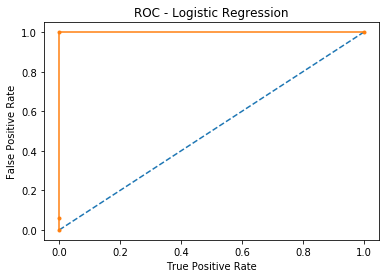

In [25]:
fpr, tpr, thresholds = roc_curve(Y_test, logit_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC - Logistic Regression')
plt.show()

### Random Forest with default parameters

In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train.squeeze())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
print('Training accuracy: ', rf.score(X_train, Y_train))
print('Test accuracy: ', rf.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=rf, X=X_train, y=Y_train.squeeze(), cv=LeaveOneOut()).mean())

Training accuracy:  1.0
Test accuracy:  0.5405405405405406
Cross val score: 0.673469387755102


In [28]:
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))

rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:,1]
rf_auc = roc_auc_score(Y_test, rf_probs)
print('AUC: {}'.format(rf_auc))

              precision    recall  f1-score   support

          -1       0.54      1.00      0.70        20
           1       0.00      0.00      0.00        17

   micro avg       0.54      0.54      0.54        37
   macro avg       0.27      0.50      0.35        37
weighted avg       0.29      0.54      0.38        37

AUC: 0.8588235294117647


/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


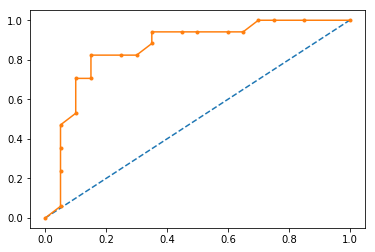

In [29]:
fpr, tpr, thresholds = roc_curve(Y_test, rf_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Decision Trees with default parameters

In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
print('Training accuracy: ', dtc.score(X_train, Y_train))
print('Test accuracy: ', dtc.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=dtc, X=X_train, y=Y_train.squeeze(), cv=LeaveOneOut()).mean())

Training accuracy:  1.0
Test accuracy:  0.6486486486486487
Cross val score: 0.6122448979591837


In [32]:
dtc_pred = dtc.predict(X_test)
print(classification_report(Y_test, dtc_pred))

dtc_probs = dtc.predict_proba(X_test)
dtc_probs = dtc_probs[:,1]
dtc_auc = roc_auc_score(Y_test, dtc_probs)
print('AUC: {}'.format(dtc_auc))

              precision    recall  f1-score   support

          -1       0.63      0.85      0.72        20
           1       0.70      0.41      0.52        17

   micro avg       0.65      0.65      0.65        37
   macro avg       0.66      0.63      0.62        37
weighted avg       0.66      0.65      0.63        37

AUC: 0.6308823529411764


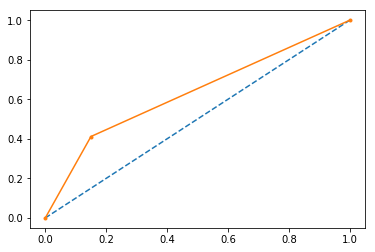

In [33]:
fpr, tpr, thresholds = roc_curve(Y_test, dtc_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Light Gradient Boosting Machine with default parameters

In [34]:
l_boost = LGBMClassifier()
l_boost.fit(X_train, Y_train.values.ravel())

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
print('Training accuracy: ', l_boost.score(X_train, Y_train))
print('Test accuracy: ', l_boost.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=l_boost, X=X_train, y=Y_train.squeeze(), cv=LeaveOneOut()).mean())

Training accuracy:  1.0
Test accuracy:  0.6486486486486487
Cross val score: 0.6870748299319728


In [36]:
l_boost_pred = l_boost.predict(X_test)
print(classification_report(Y_test, l_boost_pred))

l_boost_probs = l_boost.predict_proba(X_test)
l_boost_probs = l_boost_probs[:,1]
l_boost_auc = roc_auc_score(Y_test, l_boost_probs)
print('AUC: {}'.format(l_boost_auc))

              precision    recall  f1-score   support

          -1       0.62      0.90      0.73        20
           1       0.75      0.35      0.48        17

   micro avg       0.65      0.65      0.65        37
   macro avg       0.69      0.63      0.61        37
weighted avg       0.68      0.65      0.62        37

AUC: 0.788235294117647


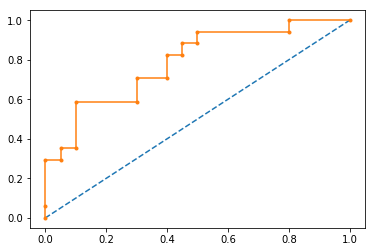

In [37]:
fpr, tpr, thresholds = roc_curve(Y_test, l_boost_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### XGBClassifier with default parameters

In [38]:
xgboostc = XGBClassifier()
xgboostc.fit(X_train, Y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
print('Training accuracy: ', xgboostc.score(X_train, Y_train))
print('Test accuracy: ', xgboostc.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=xgboostc, X=X_train, y=Y_train.squeeze(), cv=LeaveOneOut()).mean())

Training accuracy:  1.0
Test accuracy:  0.5675675675675675
Cross val score: 0.7210884353741497


In [40]:
xgboostc_pred = xgboostc.predict(X_test)
print(classification_report(Y_test, xgboostc_pred))

xgboostc_probs = xgboostc.predict_proba(X_test)
xgboostc_probs = xgboostc_probs[:,1]
xgboostc_auc = roc_auc_score(Y_test, xgboostc_probs)
print('AUC: {}'.format(xgboostc_auc))

              precision    recall  f1-score   support

          -1       0.56      0.95      0.70        20
           1       0.67      0.12      0.20        17

   micro avg       0.57      0.57      0.57        37
   macro avg       0.61      0.53      0.45        37
weighted avg       0.61      0.57      0.47        37

AUC: 0.7676470588235295


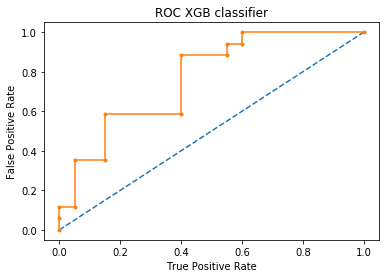

In [41]:
fpr, tpr, thresholds = roc_curve(Y_test, xgboostc_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC XGB classifier')
plt.show()

### KNeighbors Classifier with default parameters

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.squeeze())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
print('Training accuracy: ', knn.score(X_train, Y_train))
print('Test accuracy: ', knn.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=knn, X=X_train, y=Y_train.squeeze(), cv=LeaveOneOut()).mean())

Training accuracy:  0.7687074829931972
Test accuracy:  0.5675675675675675
Cross val score: 0.673469387755102


In [44]:
knn_pred = knn.predict(X_test)
print(classification_report(Y_test, knn_pred))

knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:,1]
knn_auc = roc_auc_score(Y_test, knn_probs)
print('AUC: {}'.format(knn_auc))

              precision    recall  f1-score   support

          -1       0.56      0.90      0.69        20
           1       0.60      0.18      0.27        17

   micro avg       0.57      0.57      0.57        37
   macro avg       0.58      0.54      0.48        37
weighted avg       0.58      0.57      0.50        37

AUC: 0.7044117647058823


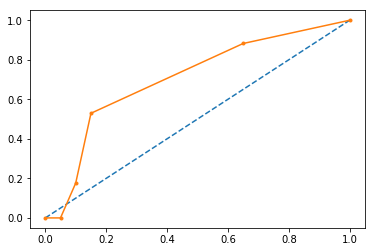

In [45]:
fpr, tpr, thresholds = roc_curve(Y_test, knn_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Gaussian Naive Bayes with default parameters

In [46]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
print('Training accuracy: ', gnb.score(X_train, Y_train))
print('Test accuracy: ', gnb.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=gnb, X=X_train, y=Y_train.squeeze(), cv=LeaveOneOut()).mean())

Training accuracy:  0.8979591836734694
Test accuracy:  0.8648648648648649
Cross val score: 0.6938775510204082


In [48]:
gnb_pred = gnb.predict(X_test)
print(classification_report(Y_test, gnb_pred))

gnb_probs = gnb.predict_proba(X_test)
gnb_probs = gnb_probs[:,1]
gnb_auc = roc_auc_score(Y_test, gnb_probs)
print('AUC: {}'.format(gnb_auc))

              precision    recall  f1-score   support

          -1       0.80      1.00      0.89        20
           1       1.00      0.71      0.83        17

   micro avg       0.86      0.86      0.86        37
   macro avg       0.90      0.85      0.86        37
weighted avg       0.89      0.86      0.86        37

AUC: 0.988235294117647


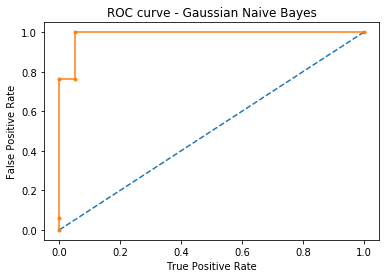

In [49]:
fpr, tpr, thresholds = roc_curve(Y_test, gnb_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC curve - Gaussian Naive Bayes')
plt.show()

In [64]:
stacked_model = VotingClassifier(estimators=[
            ('logit', logit), ('rf', rf), ('gnb', gnb), 
            ('l_boost', l_boost)], voting='soft', weights=[2, 2, 2, 2])

In [65]:
stacked_model.fit(X_train, Y_train.values.ravel())
print('Training accuracy: ', stacked_model.score(X_train, Y_train))
print('Test score', stacked_model.score(X_test, Y_test))
print('Cross val score:', cross_val_score(estimator=stacked_model, X=X_train, y=Y_train.values.ravel(), cv=LeaveOneOut()).mean())
print(stacked_model.predict(X_test) == Y_test.values.ravel())

Training accuracy:  1.0
Test score 0.8648648648648649


/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/skl

Cross val score: 0.8027210884353742
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True False  True  True  True  True  True  True  True  True  True False
  True]


/home/enock/miniconda3/envs/google-crash/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
np.count_nonzero(stacked_model.predict(X_test) == -1)

25

In [67]:
stacked_model_pred = stacked_model.predict(X_test)
print(classification_report(Y_test, stacked_model_pred))

stacked_model_probs = stacked_model.predict_proba(X_test)
stacked_model_probs = stacked_model_probs[:,1]
stacked_model_auc = roc_auc_score(Y_test, stacked_model_probs)
print('AUC: {}'.format(stacked_model_auc))

              precision    recall  f1-score   support

          -1       0.80      1.00      0.89        20
           1       1.00      0.71      0.83        17

   micro avg       0.86      0.86      0.86        37
   macro avg       0.90      0.85      0.86        37
weighted avg       0.89      0.86      0.86        37

AUC: 0.9941176470588234


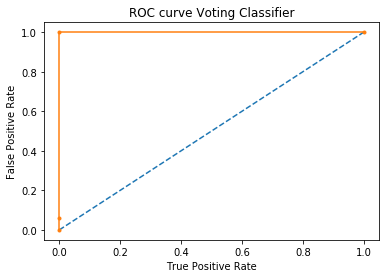

In [54]:
fpr, tpr, thresholds = roc_curve(Y_test, stacked_model_probs)

plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC curve Voting Classifier')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [62]:
np.count_nonzero(stacked_model.predict(xtest) == 1)

0

In [63]:
predicted_scores = pd.DataFrame(stacked_model.predict_proba(xtest))[1]
# predicted_scores.columns = ['Score']
predicted_scores

0     0.255532
1     0.252532
2     0.255532
3     0.252532
4     0.252532
5     0.249532
6     0.252532
7     0.255532
8     0.252532
9     0.249532
10    0.249534
11    0.252532
12    0.252532
13    0.255532
14    0.249532
15    0.255532
16    0.249532
17    0.252532
18    0.249535
19    0.252532
20    0.252533
21    0.252532
22    0.252532
23    0.252532
24    0.252532
25    0.255532
26    0.252532
27    0.255532
28    0.255532
29    0.252532
30    0.249533
31    0.252532
32    0.252532
33    0.252532
34    0.255532
35    0.252532
36    0.249532
37    0.252532
38    0.255532
39    0.255532
40    0.252532
41    0.252532
42    0.252533
43    0.252532
44    0.249532
45    0.252533
46    0.252532
47    0.252532
48    0.252532
49    0.249532
50    0.252533
51    0.252532
52    0.249532
53    0.249532
54    0.252532
55    0.255536
56    0.252532
57    0.255532
58    0.255532
59    0.255532
60    0.249533
61    0.252532
62    0.252532
63    0.252532
64    0.252533
65    0.249533
66    0.24

In [57]:
np.count_nonzero(predicted_scores > 0.5)
# pred_scores

0

In [58]:
# predicted_scores.to_csv(r'teamname.txt', header=None, index=None, sep=' ', mode='a')

In [59]:
# np.array_equal(stacked_model.named_estimators_.rf.predict(X_test),
#                 stacked_model.named_estimators_['rf'].predict(X_test))

## Optimize model parameters to improve accuracy

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import f1_score, auc

In [61]:
def Grid_Search(model, params):
    
    model = GridSearchCV(model, param_grid=params, n_jobs=-1)
    
    ### Fit model
    model.fit(X_train,Y_train)
    
    ### Print out best parameters
    print("Best Hyper Parameters:\n",model.best_params_)
    
    ### Make prediction
    prediction=model.predict(X_test)
    
    ### Print F1 score
    print("Accuracy:",f1_score(prediction,Y_test))
    
    ### Print AUC
#     print("Accuracy:", auc(prediction,Y_test))
    
    ### Print confusion matrix
    print("Confusion Metrix:\n", classification_report(Y_test, prediction))

### Logistic Regression